In [1]:
import torch
from torch.distributions import Normal, MultivariateNormal
from torch.distributions.lowrank_multivariate_normal import LowRankMultivariateNormal

from cnp.output import (
    OutputLayer,
    MeanFieldGaussianLayer,
    InnerprodGaussianLayer,
    KvvGaussianLayer,
    LogLogitCopulaLayer
)

from cnp.utils import Gamma

import matplotlib.pyplot as plt

# Mean field layer

In [2]:
mfg_layer = MeanFieldGaussianLayer()

In [3]:
B = 1
T = 7
C = 2

tensor = torch.rand(B, T, C)

mfg_layer.mean_and_cov(tensor)

(tensor([[0.5875, 0.7263, 0.9583, 0.8231, 0.4557, 0.9288, 0.4297]]),
 tensor([[[0.9917, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 1.1557, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.7999, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.7084, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.9658, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.2717, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.1280]]]),
 tensor([[[1.6848, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 1.8489, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 1.4931, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 1.4015, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 1.6589, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.9649, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0

In [4]:
B = 2
T = 7
C = 2

tensor = torch.rand(B, T, C)
y_target = torch.rand(B, T)

mfg_layer.loglik(tensor, y_target)

tensor([-8.3784, -8.8281], grad_fn=<SubBackward0>)

In [5]:
B = 1
T = 7
C = 2
num_samples = 3

tensor = torch.rand(B, T, C)

print(mfg_layer.sample(tensor, num_samples=num_samples, noiseless=False).shape)
print(mfg_layer.sample(tensor, num_samples=num_samples, noiseless=True).shape)

torch.Size([3, 1, 7])
torch.Size([3, 1, 7])


# Innerprod layer

In [6]:
num_embedding = 100
noise_type = "hetero"

innerprod_layer = InnerprodGaussianLayer(num_embedding=num_embedding,
                                         noise_type=noise_type)

In [7]:
B = 1
T = 7
C = num_embedding + 1 + int(noise_type == "hetero")

tensor = torch.rand(B, T, C)

innerprod_layer.mean_and_cov(tensor)

(tensor([[0.7931, 0.0346, 0.4723, 0.3376, 0.8013, 0.8170, 0.3348]]),
 tensor([[[0.3837, 0.2686, 0.2560, 0.2737, 0.2745, 0.2739, 0.2740],
          [0.2686, 0.3228, 0.2381, 0.2431, 0.2549, 0.2289, 0.2323],
          [0.2560, 0.2381, 0.3015, 0.2152, 0.2440, 0.2126, 0.2238],
          [0.2737, 0.2431, 0.2152, 0.3170, 0.2596, 0.2158, 0.2507],
          [0.2745, 0.2549, 0.2440, 0.2596, 0.3364, 0.2242, 0.2670],
          [0.2739, 0.2289, 0.2126, 0.2158, 0.2242, 0.2971, 0.2202],
          [0.2740, 0.2323, 0.2238, 0.2507, 0.2670, 0.2202, 0.3186]]]),
 tensor([[[1.5363, 0.2686, 0.2560, 0.2737, 0.2745, 0.2739, 0.2740],
          [0.2686, 1.2353, 0.2381, 0.2431, 0.2549, 0.2289, 0.2323],
          [0.2560, 0.2381, 1.4506, 0.2152, 0.2440, 0.2126, 0.2238],
          [0.2737, 0.2431, 0.2152, 1.0543, 0.2596, 0.2158, 0.2507],
          [0.2745, 0.2549, 0.2440, 0.2596, 1.3626, 0.2242, 0.2670],
          [0.2739, 0.2289, 0.2126, 0.2158, 0.2242, 1.1418, 0.2202],
          [0.2740, 0.2323, 0.2238, 0.2507, 0

In [8]:
B = 3
T = 10000
C = num_embedding + 1 + int(noise_type == "hetero")

tensor = torch.rand(B, T, C)
y_target = torch.rand(B, T)

%time _ = innerprod_layer.loglik(tensor, y_target)

CPU times: user 64.4 ms, sys: 38.1 ms, total: 102 ms
Wall time: 45.1 ms


In [9]:
B = 3
T = 10000
C = num_embedding + 1 + int(noise_type == "hetero")
num_samples = 5

tensor = torch.rand(B, T, C)
y_target = torch.rand(B, T)

%time _ = innerprod_layer.loglik(tensor, y_target)

CPU times: user 58.1 ms, sys: 6.01 ms, total: 64.1 ms
Wall time: 32.9 ms


# Kvv layer

In [10]:
num_embedding = 10
noise_type = "homo"

kvv_layer = KvvGaussianLayer(num_embedding=num_embedding,
                             noise_type=noise_type)

In [11]:
B = 1
T = 7
C = 12

tensor = torch.rand(B, T, C)

kvv_layer.mean_and_cov(tensor)

(tensor([[0.8463, 0.9892, 0.0661, 0.2439, 0.9806, 0.7202, 0.9284]]),
 tensor([[[0.4450, 0.1331, 0.4540, 0.1174, 0.2443, 0.0151, 0.3355],
          [0.1331, 0.0759, 0.1738, 0.0355, 0.0660, 0.0052, 0.1046],
          [0.4540, 0.1738, 0.7134, 0.1534, 0.2382, 0.0141, 0.2928],
          [0.1174, 0.0355, 0.1534, 0.0464, 0.0816, 0.0031, 0.0720],
          [0.2443, 0.0660, 0.2382, 0.0816, 0.2347, 0.0070, 0.1405],
          [0.0151, 0.0052, 0.0141, 0.0031, 0.0070, 0.0012, 0.0184],
          [0.3355, 0.1046, 0.2928, 0.0720, 0.1405, 0.0184, 0.7018]]]),
 tensor([[[1.1381, 0.1331, 0.4540, 0.1174, 0.2443, 0.0151, 0.3355],
          [0.1331, 0.7690, 0.1738, 0.0355, 0.0660, 0.0052, 0.1046],
          [0.4540, 0.1738, 1.4066, 0.1534, 0.2382, 0.0141, 0.2928],
          [0.1174, 0.0355, 0.1534, 0.7396, 0.0816, 0.0031, 0.0720],
          [0.2443, 0.0660, 0.2382, 0.0816, 0.9278, 0.0070, 0.1405],
          [0.0151, 0.0052, 0.0141, 0.0031, 0.0070, 0.6943, 0.0184],
          [0.3355, 0.1046, 0.2928, 0.0720, 0

In [12]:
B = 3
T = 7
C = 12

tensor = torch.rand(B, T, C)
y_target = torch.rand(B, T)

kvv_layer.loglik(tensor, y_target)

tensor([-6.4964, -7.0346, -6.7227], grad_fn=<SubBackward0>)

In [13]:
B = 3
T = 7
C = 12
num_samples = 5

tensor = torch.rand(B, T, C)
y_target = torch.rand(B, T)

print(kvv_layer.sample(tensor, num_samples=num_samples, noiseless=False).shape)
print(kvv_layer.sample(tensor, num_samples=num_samples, noiseless=True).shape)

torch.Size([5, 3, 7])
torch.Size([5, 3, 7])


# Log-logit copula layer

In [14]:
num_embedding = 100
noise_type = "homo"

gaussian_layer = KvvGaussianLayer(num_embedding=num_embedding,
                                  noise_type=noise_type)

copula_layer = LogLogitCopulaLayer(gaussian_layer=gaussian_layer)

In [15]:
B = 3
T = 7
C = 104

tensor = torch.rand(B, T, C)
y_target = torch.rand(B, T)

copula_layer.loglik(tensor, y_target)

tensor([-17.4313,  -8.6087, -14.2195], grad_fn=<AddBackward0>)

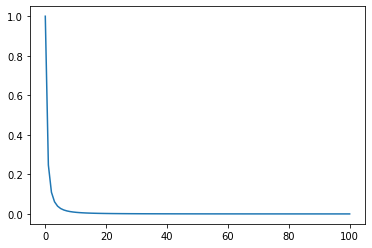

In [16]:
x = torch.linspace(1e-9, 100., 100)
a = 1.*torch.ones_like(x)
b = 1.*torch.ones_like(x)

pdf = copula_layer.pdf(x, a, b).numpy()

plt.plot(x, pdf)
plt.show()

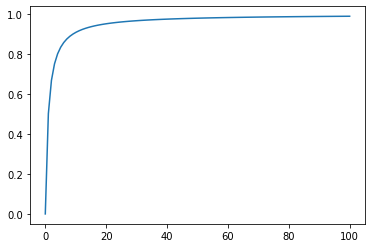

In [17]:
x = torch.linspace(1e-9, 100., 100)
a = 1.*torch.ones_like(x)
b = 1.*torch.ones_like(x)

cdf = copula_layer.cdf(x, a, b).numpy()

plt.plot(x, cdf)
plt.show()

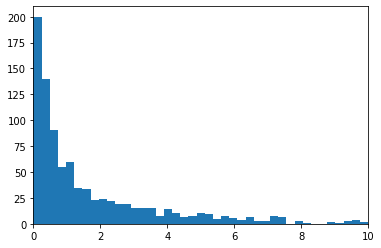

In [18]:
x = torch.rand(1000)
a = 1.*torch.ones_like(x)
b = 1.*torch.ones_like(x)

plt.hist(copula_layer.icdf(x, a, b).numpy(), bins=5000)
plt.xlim([0, 10])
plt.show()

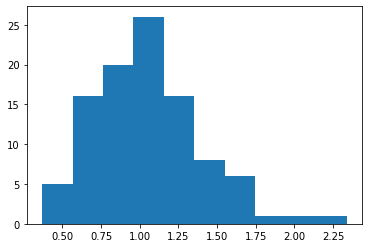

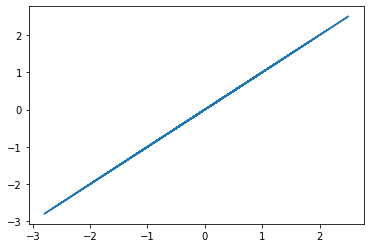

In [19]:
x = torch.randn(100)
a = 1.*torch.ones_like(x)
b = 6.*torch.ones_like(x)

y = copula_layer.marginal_transformation(x, a, b)

plt.hist(y.numpy())
plt.show()

x_ = copula_layer.inverse_marginal_transformation(y, a, b).numpy()

plt.plot(x, x_)
plt.show()

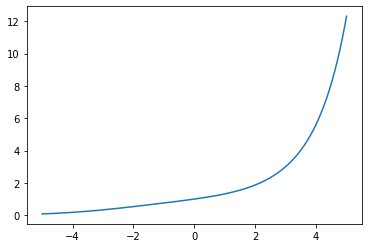

In [22]:
x = torch.linspace(-5., 5., 1000)
a = 1.*torch.ones_like(x)
b = 6.*torch.ones_like(x)

y = copula_layer.marginal_transformation(x, a, b)

plt.plot(x, y)
plt.show()